# 주성분 분석(PCA)

김보람  
2023-06-11

# REF

http://rfriend.tistory.com/61

차원축소(dimension reduction) : PCA(Principal Component Analysis)

In [1]:
secu_com_finance_2007 <- read.csv("secu_com_finance_2007.csv",
                                  header = TRUE, 
                                  stringsAsFactors = FALSE)

> V1 : 총자본순이익율
>
> V2 : 자기자본순이익율
>
> V3 : 자기자본비율
>
> V4 : 부채비율
>
> V5 : 자기자본회전율

In [3]:

# 표준화 변환 (standardization)
secu_com_finance_2007 <- transform(secu_com_finance_2007, 
                                   V1_s = scale(V1), 
                                   V2_s = scale(V2), 
                                   V3_s = scale(V3), 
                                   V4_s = scale(V4),
                                   V5_s = scale(V5))

V1,V2,V3,V5는 숫자가 클 수록 좋고 V4는 숫자가 클수록 안좋다.

즉, V4의 방향을 변환(표준화된 이후의 max 값에서 표준화된 이후의 관찰값을
뺌)

In [4]:
# 부채비율(V4_s)을 방향(max(V4_s)-V4_s) 변환
secu_com_finance_2007 <- transform(secu_com_finance_2007, 
                                    V4_s2 = max(V4_s) - V4_s)

In [5]:
# variable selection
secu_com_finance_2007_2 <- secu_com_finance_2007[,c("company", "V1_s", "V2_s", "V3_s", "V4_s2", "V5_s")]

In [8]:
# Correlation analysis
round(cor(secu_com_finance_2007_2[,-1]), digits=3)

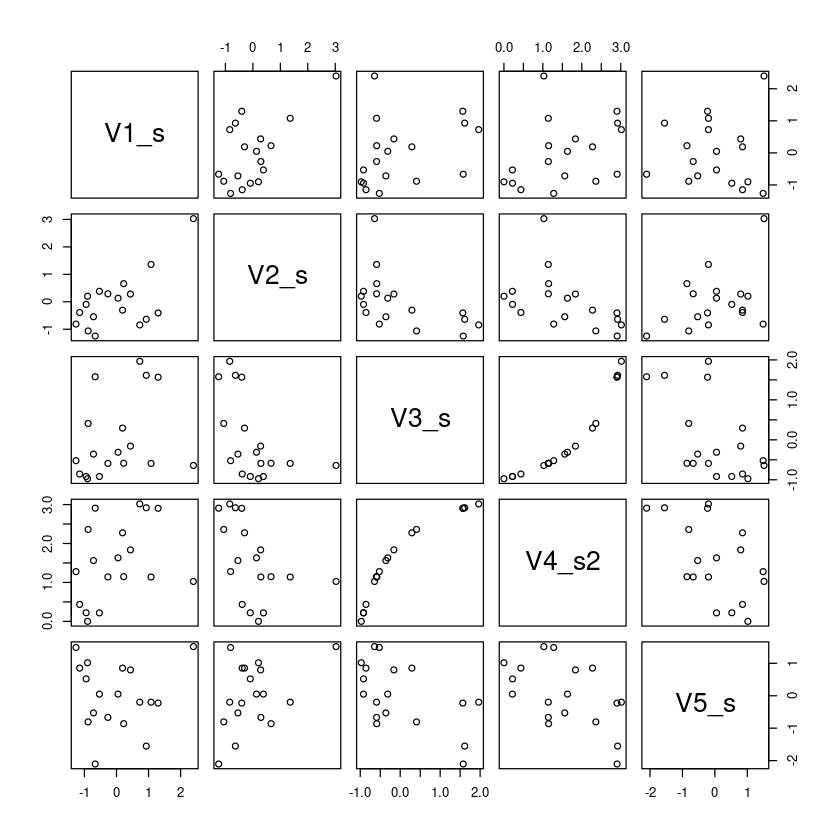

In [10]:
# Scatter plot matrix
plot(secu_com_finance_2007_2[,-1])

In [11]:
# 주성분분석 PCA(Principal Component Analysis)
secu_prcomp <- prcomp(secu_com_finance_2007_2[,c(2:6)]) # 첫번째 변수 회사명은 빼고 분석
 
summary(secu_prcomp)

In [12]:
print(secu_prcomp)

Standard deviations (1, .., p=5):
[1] 1.6617648 1.2671437 0.7419994 0.2531070 0.1351235

Rotation (n x k) = (5 x 5):
              PC1        PC2           PC3          PC4         PC5
V1_s   0.07608427 0.77966993  0.0008915975  0.140755404  0.60540325
V2_s  -0.39463007 0.56541218 -0.2953216494 -0.117644166 -0.65078503
V3_s   0.56970191 0.16228156  0.2412221065  0.637721889 -0.42921686
V4_s2  0.55982770 0.19654293  0.2565972887 -0.748094314 -0.14992183
V5_s  -0.44778451 0.08636803  0.8881182665  0.003668418 -0.05711464

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F2164943E55C589FE2D)

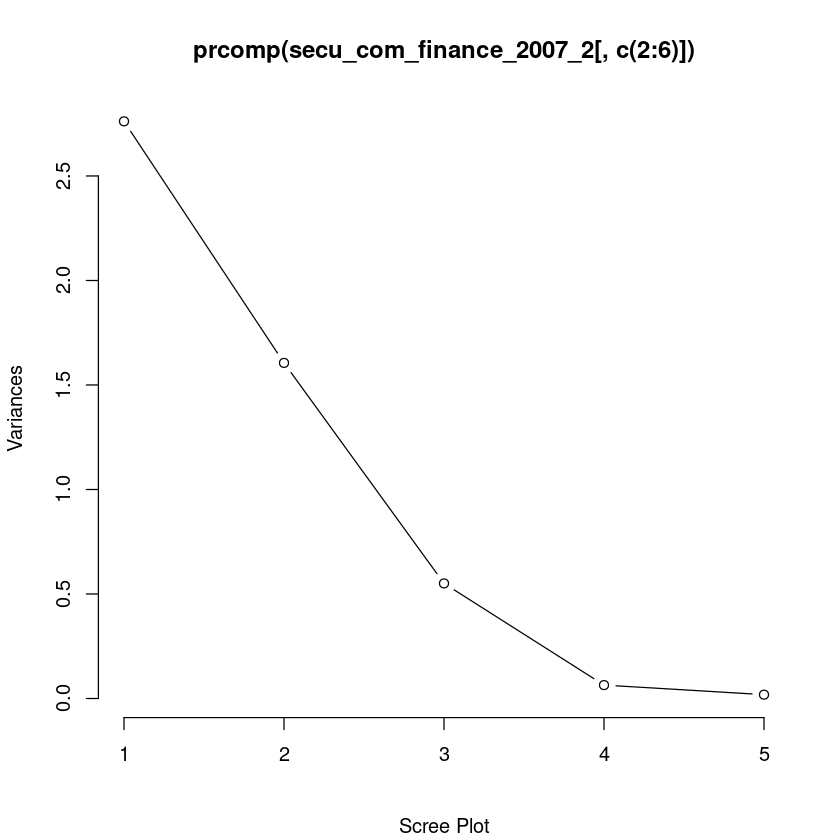

In [13]:
# Scree Plot
plot(prcomp(secu_com_finance_2007_2[,c(2:6)]), type="l",
      sub = "Scree Plot")

-   3개 주성분이 적합

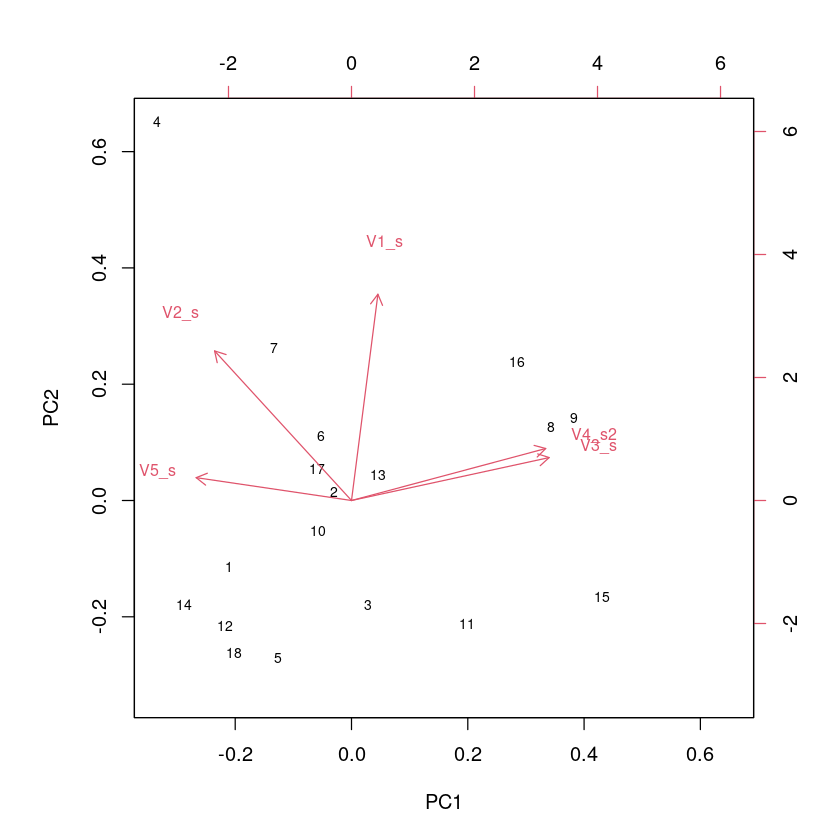

In [16]:
# Biplot
biplot(prcomp(secu_com_finance_2007_2[,c(2:6)]), cex = c(0.7, 0.8))
 
 # 관측치별 주성분1, 주성분2 점수 계산(PC1 score, PC2 score)
secu_pc1 <- predict(secu_prcomp)[,1]
secu_pc2 <- predict(secu_prcomp)[,2]
 
 
# 관측치별 이름 매핑(rownames mapping)
 text(secu_pc1, secu_pc2, labels = secu_com_finance_2007_2$company, cex = 0.7, pos = 3, col = "blue")